# Метод опорних векторів

&emsp;&emsp;Метод опорних векторів (support vectors machine, SVM) - досить потужний алгоритм завдання класифікації, що може розглядатися як конкурент логістичної регресії. Для пояснення принципу його роботи, почнемо з функції втрат логістичної регресії з регуляризацією L2:

$$Loss = -\sum_{i=1}^{n}{[y_{i}ln(p(y_{i})) + (1-y_{i})ln(1-p(y_{i}))]} + \lambda\sum_{j=1}^{m}{w_{j}^{2}}$$

$$p(y_{i}) = \frac{1}{1 + exp(-w^{T}x_{i})}$$

&emsp;&emsp;Оскільки нас не цікавить саме значення мінімуму функції втрат, а скоріше значення параметрів, при якому вона набуває свого мінімального значення, ми можемо поділити цю функцію на константу, що не призведе до зміни точки, в якій знаходиться мінімум. Перепишемо нашу функцію так:

$$Loss = С\sum_{i=1}^{n}{[y_{i}(-ln(p(y_{i}))) + (1-y_{i})(-ln(1-p(y_{i})))]} + \sum_{j=1}^{m}{w_{j}^{2}}, \text{ где } C = \frac{1}{\lambda}$$

&emsp;&emsp;Значення $-ln(p(y_{i}))$ - це втрата, яку ми несемо, якщо приклад позитивний, а $-ln(1 - p(y_{i}))$ якщо негативний. Побудуємо графіки функцій цих втрат для певного інтервалу:

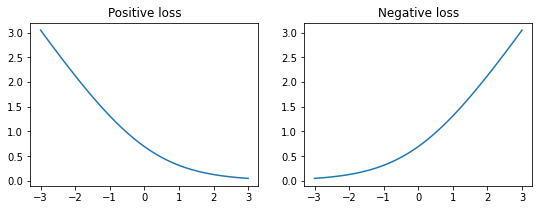

In [45]:
import numpy as np
from matplotlib import pyplot as plt

def positive_loss(x):
    
    return -np.log(1 / (1 + np.exp(-x)))

def negative_loss(x):
    
    return -np.log(1 - 1 / (1 + np.exp(-x)))

x = np.linspace(-3, 3, 100)

plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.plot(x, positive_loss(x))
plt.title('Positive loss')

plt.subplot(1, 2, 2)
plt.plot(x, negative_loss(x))
plt.title('Negative loss')

plt.show()

&emsp;&emsp;Ми могли б досить непогано наблизити отримані функції втрат такими простими функціями:

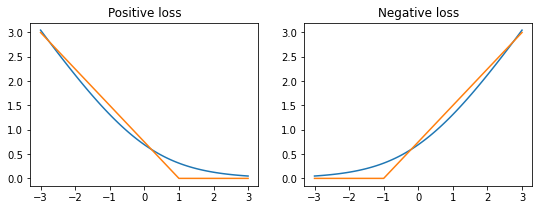

In [46]:
def positive_relu(x):
    
    return np.where(x > 1, 0, 0.75 - 0.75 * x)

def negative_relu(x):
    
    return np.where(x < -1, 0, 0.75 + 0.75 * x)

plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.plot(x, positive_loss(x))
plt.plot(x, positive_relu(x))
plt.title('Positive loss')

plt.subplot(1, 2, 2)
plt.plot(x, negative_loss(x))
plt.plot(x, negative_relu(x))
plt.title('Negative loss')

plt.show()

&emsp;&emsp;Конкретне значення кута нахилу тут не має значення. Що важливо зрозуміти, то це те, що ми можемо перейти від функції з різним значенням похідної на різних ділянках до такої, яка дає постійний штраф на ділянці менше 1 для позитивних прикладів і більше -1 для негативних.

&emsp;&emsp; Замінивши $-ln(p(y_{i})) = -ln(\frac{1}{1 + exp(-w^{T}x_{i})})$ на $cost_{1}(w^{T}x_{i})$, а $-ln(1-p(y_{i}))$ на $cost_{0}(w^{T}x_{i})$ отримаємо:

$$Loss = С\sum_{i=1}^{n}{[y_{i}cost_{1}(w^{T}x_{i}) + (1-y_{i})cost_{0}(w^{T}x_{i})]} + \sum_{j=1}^{m}{w_{j}^{2}}$$

&emsp;&emsp;Фінально, оптимальний набір параметрів находимо як:

$$w = argmin\Big[С\sum_{i=1}^{n}{[y_{i}cost_{1}(w^{T}x_{i}) + (1-y_{i})cost_{0}(w^{T}x_{i})]} + \sum_{j=1}^{m}{w_{j}^{2}}\Big]$$

&emsp;&emsp;У результаті, ми знайдемо набір параметрів w, який задаватиме рівняння гіперплощини з одного боку якої є приклади першого класу, а з іншого другого.

&emsp;&emsp; Побудуємо модель SVM для даних про види ірисів:

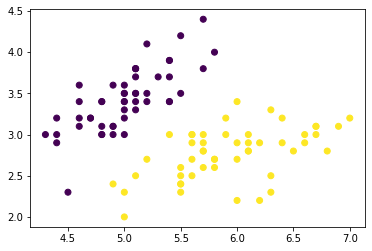

In [48]:
from sklearn import datasets

# вивантажимо дані
iris = datasets.load_iris()
X = iris.data[:, :2]  # скористаємося лише першими двома колонками
y = iris.target

# видалимо один із класів, щоб залишитися із завданням бінарної класифікації
X, y = X[y != 2], y[y != 2]

# подивимося, як виглядають наші дані
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [49]:
# pip install mlxtend

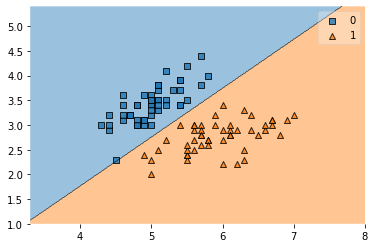

In [50]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# ініціалізувати модель SVM (в sklearn SVC - support vectors classifier)
svm = SVC(
    C=1.,  # значення константи регулярізації з формули вище: чим більше, тим слабше регулярізація
    kernel='linear'  # тип відстані між точками (про цей параметр нижче)
)

svm = svm.fit(X, y)  # навчимо модель

# побудуємо графік, де відобразимо в яких областях який клас вибирає наша модель
plot_decision_regions(X, y, clf=svm)
plt.show()

In [51]:
from sklearn.metrics import f1_score

y_preds = svm.predict(X)
f1_score(y, y_preds)

1.0

&emsp;&emsp;Іноді дані неможливо розділити в тому просторі змінних, в якому вони спочатку знаходяться, однак це цілком можливо в просторах вищої розмірності. Підвищити розмірність даних можна штучно, додавши до змінних значення їх квадратів, наприклад. Але яку саме функцію варто вибрати підвищення розмірності і скільки нових змінних варто додати?

&emsp;&emsp;SVM створює новий простір високої розмірності, замінюючи оригінальні змінні для кожної точки на відстані до інших точок даних. Тобто, якщо в наборі даних n спостережень, для кожного можна порахувати n відстаней (включаючи нульову відстань до самого себе) + додати значення константи, що створить новий простір розмірності n+1.

&emsp;&emsp;Запропонована вище відстань обчислюють як $k(x_{i}, x_{j})$, тобто як деяка функція від двох точок, яка швидше відіграє роль відстані, ніж є ним насправді. Така функція називається кернелом. Найпопулярнішими кернелами є такі:

$$linear: k(x_{i}, x_{j}) = x_{i}^Tx_{j}$$

$$polynomial: k(x_{i}, x_{j}) = (\gamma x_{i}^{T}x_{j} + r)^{d}$$

$$rbf: k(x_{i}, x_{j}) = exp(-\gamma ||x_{i} - x_{j}||^{2})$$

$$sigmoid: k(x_{i}, x_{j}) = tanh(\gamma x_{i}^{T}x_{j} + r)$$

Спробуємо перебудувати нашу модель, скориставшись RBF кернелом:

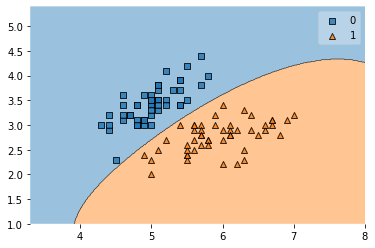

In [52]:
svm = SVC(C=1., kernel='rbf')

svm = svm.fit(X, y)  # навчимо модель

# побудуємо графік, де відобразимо в яких областяхях який клас вибирає наша модель
plot_decision_regions(X, y, clf=svm)
plt.show()

In [53]:
y_preds = svm.predict(X)
f1_score(y, y_preds)

1.0

&emsp;&emsp;Як і для більшості інших моделей, перехід до кількох класів цільової змінної здійснюється через побудову кількох моделей - по одній на кожен клас:

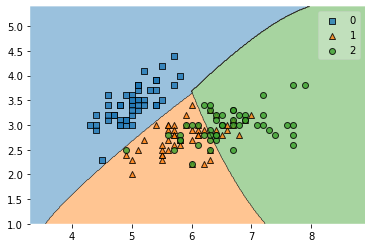

In [54]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

svm = SVC(
    C=1.,
    kernel='rbf',
    decision_function_shape='ovr'  # побудувати по моделлю на кожен клас, як "один проти всіх"
).fit(X, y)

plot_decision_regions(X, y, clf=svm)
plt.show()

In [55]:
y_preds = svm.predict(X)
f1_score(y, y_preds, average='macro')

0.8198378540686617

&emsp;&emsp;Подивимося, як впливає параметр регуляризації на форму межі прийняття рішень:

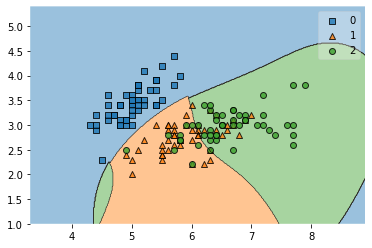

In [56]:
svm2 = SVC(
    C=200,
    kernel='rbf',
    decision_function_shape='ovr'  # побудувати по моделлю на кожен клас, як "один проти всіх"
).fit(X, y)
plot_decision_regions(X, y, clf=svm2)  # крайній випадок дуже слабкої регуляризації
plt.show()

In [57]:
y_preds = svm2.predict(X)
f1_score(y, y_preds, average='macro')

0.8191136569189026

# Подбір гіперпараметрів

&emsp;&emsp;Для SVM, як і для більшості інших алгоритмів, постає питання про найкращий набір гіперпараметрів (таких параметрів, значення яких не можна обчислити на основі даних). Який кернел краще вибрати, яке оптимальне значення параметра регулювання? Зазвичай краще значення прийнято вибирати, виходячи з результатів роботи моделі на тестовому наборі, а краще на крос-валідації.

&emsp;&emsp;Для того, щоб спростити цей процес у sklearn є клас, що дозволяє перебрати всі комбінації значень різних параметрів, оцінюючи при цьому точність моделі на крос-валідації.

In [58]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

svm = SVC()  # ініціалізація моделі

# ініціалізація значень параметрів, для яких здійснити пошук (будуть протестовані всі комбінації значень)
params_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.5, 1, 2, 5]
}

# ініціалізація об'єкта для пошуку оптимальних значень параметрів
clf = GridSearchCV(
    estimator=svm,  # модель, яку потрібно протестувати
    param_grid=params_grid,  # словник з іменами параметрів та списком їх значень
    scoring='f1_macro',  # назва метрики якості, яку необхідно використовувати
    cv=4  # кількість тестових наборів
)

clf = clf.fit(X, y)  # пошук значень
grid_search_results = pd.DataFrame(clf.cv_results_)  # отримання результатів пошуку у вигляді таблиці
grid_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002669,0.000286,0.001824,0.000422,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.753695,0.839744,0.786325,0.858517,0.809570,0.041739,2
1,0.002991,0.000707,0.002038,0.000711,0.5,poly,"{'C': 0.5, 'kernel': 'poly'}",0.753695,0.839744,0.760000,0.858517,0.802989,0.046670,6
2,0.003846,0.001877,0.003669,0.001356,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.777778,0.865808,0.786325,0.858517,0.822107,0.040252,1
3,0.008412,0.003623,0.004510,0.002087,0.5,sigmoid,"{'C': 0.5, 'kernel': 'sigmoid'}",0.160000,0.160000,0.141844,0.111111,0.143239,0.019975,13
4,0.007845,0.005490,0.003962,0.001142,1,linear,"{'C': 1, 'kernel': 'linear'}",0.777778,0.839744,0.760000,0.835288,0.803202,0.034920,3
5,0.007830,0.003238,0.004112,0.002312,1,poly,"{'C': 1, 'kernel': 'poly'}",0.753695,0.839744,0.760000,0.858517,0.802989,0.046670,6
6,0.002665,0.000603,0.004525,0.002079,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.753695,0.839744,0.760000,0.858517,0.802989,0.046670,6
7,0.008514,0.004020,0.006049,0.001271,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.160000,0.160000,0.141844,0.111111,0.143239,0.019975,13
8,0.002887,0.002151,0.003302,0.001280,2,linear,"{'C': 2, 'kernel': 'linear'}",0.777778,0.839744,0.760000,0.835288,0.803202,0.034920,3
9,0.010545,0.004385,0.005575,0.002391,2,poly,"{'C': 2, 'kernel': 'poly'}",0.753695,0.839744,0.760000,0.858517,0.802989,0.046670,6


# Наївний Баєсовський класифікатор

&emsp;&emsp;Почнемо з деяких визначень:

&emsp;&emsp;Умовна ймовірність: $P(y|x)$ - ймовірність того, що станеться подія $y$, якщо вже сталася подія $x$.

&emsp;&emsp;Спільна ймовірність: $P(x, y)$ - ймовірність того, що події $x$ та $y$ відбудуться одночасно.

&emsp;&emsp;Безумовна ймовірність: $P(x)$ - ймовірність того, що відбудеться подія $х$.

&emsp;&emsp;Ймовірність того, що обидві події відбудуться, дорівнює ймовірності того, що відбудеться перша подія, а потім друга, за умови, що перша вже відбулася. Порядок при цьому неважливий. Формально можемо записати:

$$P(x, y) = P(y|x)P(x) = P(x|y)P(y)$$

&emsp;&emsp;При цьому, якщо події незалежні одна від одної, то $P(y|x)=P(y)$ і для них $P(x, y) = P(x)P(y)$

&emsp;&emsp;Якщо переписати перше співвідношення, то отримаємо відому формулу Байєса:

$$P(y|x) = \frac{P(y)P(x|y)}{P(x)}$$

&emsp;&emsp;Приклади.

&emsp;&emsp; 1)

&emsp;&emsp; 2)

&emsp;&emsp;Якщо змінних $х$ кілька, то більш загальному вигляді можемо записати:

$$P(y|x_{1}, \dots, x_{n}) = \frac{P(y)P(x_{1}, \dots, x_{n}|y)}{P(x_{1}, \dots, x_{n})}$$

&emsp;&emsp;Зробимо таке припущення (через яке класифікатор отримав назву "наївний", тому що в більшості випадків воно некоректне): всі змінні $х$ незалежні одина від одної. Формально це означає таке:

$$P(x_{i}|y, x_{1}, \dots, x_{i-1}, x_{i+1}, \dots, x_{n}) = P(x_{i}|y)$$

&emsp;&emsp;Тоді попередню формулу можна переписати у такому вигляді:

$$P(y|x_{1}, \dots, x_{n}) = \frac{P(y)\prod_{i=1}^{n}{P(x_{i}|y)}}{P(x_{1}, \dots, x_{n})}$$

&emsp;&emsp;Знаменник $P(x_{1}, \dots, x_{n})$ є константою, яка залежить тільки від конкретного набору даних. Імовірність того, що $y$ належить тому чи іншому класу, пропорційна чисельнику формули, і ми можемо прийняти рішення про те, куди віднести новий приклад, вибравши той клас, для якого значення чисельника більше. Формально можемо записати:

$$y_{class} = argmaxP(y)\prod_{i=1}^{n}{P(x_{i}|y)}$$

&emsp;&emsp;Останнє, що нам залишається зробити, щоб користуватися запропонованим алгоритмом на практиці, це визначитись, чому дорівнює $P(x_{i}|y)$ (імовірність конкретного значення $x_{i}$ за умови, що спостереження належить класу $y$). Ця можливість визначається виходячи зі специфіки завдання. Якщо взяти приклад завдання класифікації ірисів, то змінні вважатимуться приблизно нормально розподіленими і ця ймовірність буде пропорційна щільності функції нормального розподілу:

$$P(x_{i}|y) = \frac{1}{\sqrt{2\pi}\sigma_{y}}exp(-\frac{(x_{i} - \mu_{y})^{2}}{2\sigma_{y}^{2}})\text{ , где}$$

$$\sigma_{y}\text{ - дисперсія змінної х, порахована тільки для прикладів класу у}$$

$$\mu_{y}\text{ - середнє значення змінної х, пораховане лише для прикладів класу у}$$

&emsp;&emsp;Тепер все готове для побудови самої моделі.

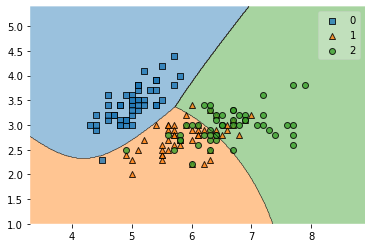

In [59]:
# GaussianNB - вид класифікатора, для якого ймовірність P(x|y) визначена пропорційно до щільності
# нормального розподілу, як було запропоновано вище
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X, y)  # визначення та тренування класифікатора

# побудуємо графік із областями прийняття рішень
plot_decision_regions(X, y, clf=gnb)
plt.show()

In [60]:
y_preds = gnb.predict(X)
f1_score(y, y_preds, average='macro')

0.780354081010275

# Метод к-середніх

&emsp;&emsp;Метод k-середніх - це один із найпростіших і найпопулярніших алгоритмів кластеризації. Кластеризація - це процес угруповання даних у деякі групи (кластери) за принципом близькості одного спостереження до іншого. Якщо точки розташовані в просторі близько одна до одної, тобто є сенс припустити, що вони можуть належати до одного класу. При цьому явна інформація про клас не використовується, тому всі алгоритми кластеризації називаються навчанням без вчителя (вчитель не дає правильні відповіді, не показуючи справжні класи під час навчання).

&emsp;&emsp;Використовується кластеризація найчастіше для зниження розмірності простору. Наприклад, якщо деяке явища описується сотнями змінних, але є можливість згрупувати всі спостереження в чіткі кластери, то замість сотень змінних можна скористатися лише однією факторною, яка відповідає номеру кластера, в який потрапляє точка. З іншого боку, можна прийняти рішення побудувати кілька окремих моделей для кожного кластера, якщо є причини очікувати різної поведінки або просто додати кластери як додаткову змінну, що теж часто дозволяє поліпшити результати оригінальної моделі.

&emsp;&emsp;Рідше кластерами користуються для прогнозування: для нового спостереження видати середнє значення того кластера, до якого воно відноситься.

&emsp;&emsp;Починається алгоритм k-середніх з того, що ми виберемо число кластерів, на яке хочемо розділити наші дані, і спробуємо вгадати, де знаходяться центри цих кластерів. При цьому відноситимемо кожну точку до того кластера, до центру якого вона знаходиться найближче:

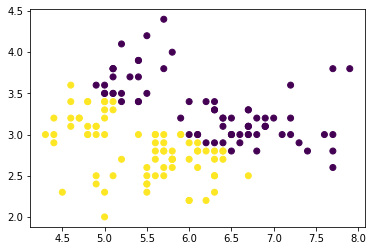

In [61]:
np.random.seed(1)  # зафіксуємо випадковий стан

num_clusters = 2  # оберемо кількість кластерів

# зробимо здогад, де знаходяться оптимальні центри цих кластерів, вибравши 2 випадкові точки з даних
guess = X[np.random.choice(range(len(X)), size=num_clusters, replace=False),:]

# порахуємо відстань від кожної точки до наших центрів
distances = np.empty((X.shape[0], num_clusters))
for i in range(num_clusters):
    diff = X - guess[i]
    distances[:, i] = np.linalg.norm(diff, axis=1)
    
cluster = np.argmin(distances, axis=1) # виберемо до якого кластера краще віднести кожну точку

# побудуємо наш результат на графіку
plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.show()

&emsp;&emsp;Тепер, вже маючи кластери, можемо порахувати середнє значення у кожному з них і визначити справжній центр отриманих кластерів. При цьому деякі точки, можливо, поміняють свій кластер:

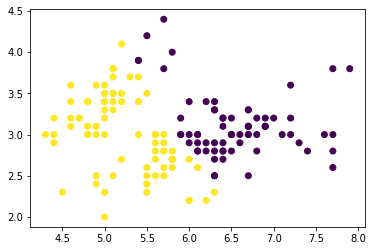

In [62]:
# обчислимо становище центрів кластерів
cluster_means = np.array([np.mean(X[cluster==i], axis=0) for i in range(num_clusters)])

# перерахуємо результати, маючи нові оцінки центрів
distances = np.empty((X.shape[0], num_clusters))
for i in range(num_clusters):
    diff = X - cluster_means[i]
    distances[:, i] = np.linalg.norm(diff, axis=1)

cluster = np.argmin(distances, axis=1)

plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.show()

&emsp;&emsp;Є сенс повторювати процедуру доти, доки положення центрів кластерів не перестануть суттєво змінюватися:

In [66]:
# задаємо початкові параметри алгоритму
np.random.seed(1)  # зафіксуємо випадковий стан
means0 = X[np.random.choice(range(len(X)), size=num_clusters, replace=False),:]  # здогад про положення центрів
distances = None
cluster = np.zeros(len(X))
epsilon = 0.01  # максимальна зміна, після якої вважаємо, що центри вже не змінюються

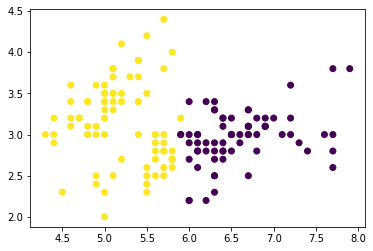

In [67]:
i = 0
while True:
    i += 1
    # розподілимо точки за кластерами
    distances = np.empty((X.shape[0], num_clusters))
    for i in range(num_clusters):
        diff = X - means0[i]
        distances[:, i] = np.linalg.norm(diff, axis=1)

    cluster = np.argmin(distances, axis=1)
    
    # отримаємо поточні середні значення і порівняємо, як вони змінилися порівняно з попередніми
    means1 = np.array([np.mean(X[cluster==i], axis=0) for i in range(num_clusters)])
    if np.sum(np.abs(means0 - means1)) <= epsilon:
        break  # перериваємо пошук, якщо середні практично не змінилися
    else:
        means0 = means1

# збережемо результати для подальшого порівняння
attempt1_distances, attempt1_clusters = distances, cluster

plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.show()

&emsp;&emsp;Повторивши цю процедуру починаючи з іншого припущення можна опинитися з іншими кластерами:

In [68]:
# задаємо початкові параметри алгоритму
np.random.seed(28)  # зафіксуємо випадковий стан
means0 = X[np.random.choice(range(len(X)), size=num_clusters, replace=False),:]  # здогад про положення центрів
distances = None
cluster = np.zeros(len(X))
epsilon = 0.01  # максимальна зміна, після якої вважаємо, що центри вже не змінюються

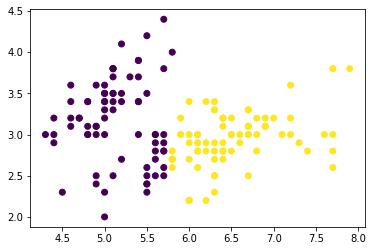

In [69]:
while True:
    # розподілимо точки за кластерами
    distances = np.empty((X.shape[0], num_clusters))
    for i in range(num_clusters):
        diff = X - means0[i]
        distances[:, i] = np.linalg.norm(diff, axis=1)

    cluster = np.argmin(distances, axis=1)

    # отримаємо поточні середні значення і порівняємо, як вони змінилися порівняно з попередніми
    means1 = np.array([np.mean(X[cluster==i], axis=0) for i in range(num_clusters)])
    if np.sum(np.abs(means0 - means1)) <= epsilon:
        break  # перериваємо пошук, якщо середні практично не змінилися
    else:
        means0 = means1

# збережемо результати для подальшого порівняння
attempt2_distances = distances
attempt2_clusters = cluster

plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.show()

&emsp;&emsp;Як зрозуміти який варіант краще? Зазвичай кращим вважається той, який створив однорідніші кластери. Мірою однорідності можна вважати суму квадратів відстаней від кожної точки до найближчого центру кластера: чим вона менша, тим більш однорідний кластер:

In [22]:
attempt1_ss = np.sum(np.min(attempt1_distances ** 2, axis=1))
attempt2_ss = np.sum(np.min(attempt2_distances ** 2, axis=1))

print(attempt1_ss, attempt2_ss)

58.21499731615674 58.44759246088194


&emsp;&emsp;У цьому випадку ми повинні віддати перевагу першому варіанту, хоча результати практично не відрізняються. На практиці алгоритм зробить кілька спроб ініціалізації кластерів і залишить ту, при якій сума квадратів відстаней мінімальна.

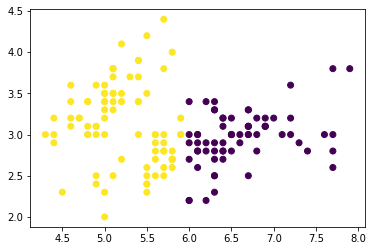

In [73]:
from sklearn.cluster import KMeans

# ініціалізуємо модель кластеризації
km = KMeans(
    n_clusters=2,  # кількість кластерів
    n_init=10,  # кількість спроб ініціалізації
    random_state=42  # фіксація випадкового стану
)

# отримаємо значення кластерів
km = km.fit(X)
clusters = km.labels_

plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.show()

&emsp;&emsp;Основний параметр, який потрібно вибрати - це кількість кластерів. Користуватися в нашому випадку критерієм однорідності прямо, не можна, тому що в гіршому випадку можна створити стільки кластерів, скільки є точок у наборі даних, що дасть дисперсію нуля (ідеально однорідні кластери). Очевидно, від таких кластерів буде мало користі, оскільки вони не мають жодних узагальнюючих властивостей.

&emsp;&emsp;Імплементація KMeans у sklearn дозволяє отримати критерій однорідності як атрибут inertia: суму квадратів відстаней до найближчих центрів. Побудуємо графік залежності цього значення для різної кількості кластерів:

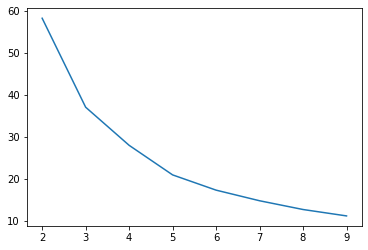

In [71]:
inertias = []
for num_clusters in range(2, 10):    
    km = KMeans(n_clusters=num_clusters).fit(X)
    inertias.append(km.inertia_)
    
plt.plot(range(2, 10), inertias)
plt.show()

&emsp;&emsp;Такий графік називається "ліктєвим" (ліктєва ділянка) із-за схожості з формою ліктя. Вибрати кількість кластерів слід виходячи з того, де в цьому графіку знаходиться приблизно найбільш сильний кут. У нашому випадку це десь 2-3, що приблизно відповідає кількості наших класів у даних.

&emsp;&emsp;Остаточне рішення потрібно приймати за результатами перехресної перевірки тієї моделі, для якої була створена ця кластеризація.

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Просторова кластеризація додатків із шумом на основі щільності

&emsp;&emsp;У алгоритмі к-середніх є ряд недоліків, які роблять неможливим його використання в деяких ситуаціях. А саме:

&emsp;&emsp;1. Далеко не завжди є можливість точно визначити кількість кластерів. Наприклад, якщо поточні дані - це координати і ми хочемо отримати кластери, в яких частіше всього буває той або інший користувач, очевидно, кількість кластерів буде індивідуальна.

&emsp;&emsp;2. Кластери, які отримуються при використанні к-середніх зазвичай мають сферичну форму, оскільки алгоритм прагне створити для кожного середнього деякий осередок з точок. Якщо є підстави очікувати іншу форму кластерів (на прикладі, якщо інші кластери є траекторією руху), то к-середніх може бути далеко не найкращим вибором.

&emsp;&emsp;3. Евклідова відстань на площині, якою за замовчуванням користується алгоритм, не завжди коректна. У тому ж прикладі з координатами користувачів ми можемо хотіти скористатися іншою мірою відстанні, визначеною на сфері.

&emsp;&emsp;4. К-середніх завжди підбере кращий кластер для кожної точки в даних. Однак іноді це небажано із-за наявності викидів, які було б краще просто ігнорувати і не відносити ні до якого кластеру взагалі.

&emsp;&emsp;Алгоритм кластеризації DBSCAN здатний вирішити всі перераховані вище проблеми. Ідея алгоритму наступна:

&emsp;&emsp;1. Почати з якоюсь випадкової точки в даних і віднести до її кластеру всі сусідні точки на відстані не більше заданої.

&emsp;&emsp;2. Далі переходимо до наступної точки в цьому ж кластері і намагаємося тим самим способом знайти сусідів для неї.

&emsp;&emsp;3. Коли поруч більше немає точок, які знаходилися б у зоні досягнення, то переходимо до тих точок, які ще не мають свого кластера.

&emsp;&emsp;4. Остаточно відкидаємо ті кластери, які містять менше n точок, вважаючи їх випадковим шумом.

&emsp;&emsp;Для ілюстрації алгоритму роботи та порівняння з к-середніми скористаємося даними, які нагадують по формі 2 півмісяця. Такі дані можуть бути прикладом двох траекторій руху в просторі:

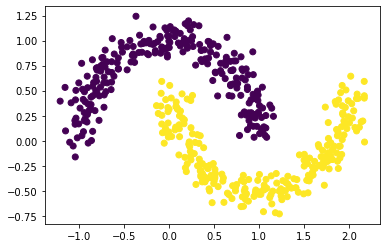

In [78]:
# генеруємо цікаві нам дані і подивимося, як виглядають отримані кластери
X, y = datasets.make_moons(n_samples=500, noise=.1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

&emsp;&emsp;Визначимо оптимальну кількість кластерів для к-середніх

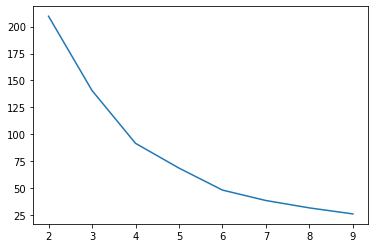

In [81]:
inertias = []
for num_clusters in range(2, 10):    
    km = KMeans(n_clusters=num_clusters).fit(X)
    inertias.append(km.inertia_)
    
plt.plot(range(2, 10), inertias)
plt.show()

&emsp;&emsp;Тобто, варто взяти 2 кластери

&emsp;&emsp;Поділимо дані на 2 кластери за допомогою к-середніх і подивимося, що вийшло:

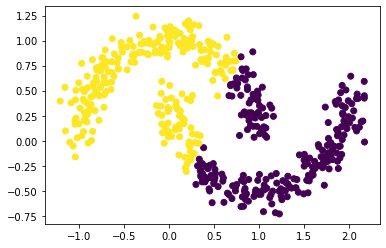

In [82]:
km_clusters = KMeans(n_clusters=2).fit(X).labels_

plt.scatter(X[:, 0], X[:, 1], c=km_clusters)
plt.show()

&emsp;&emsp;Тепер скористаємося DBSCAN і подивимося, чи можемо ми зробити краще

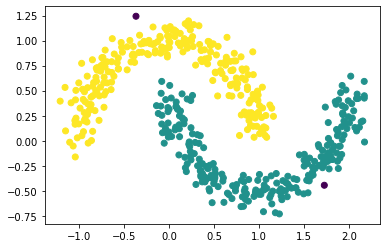

In [83]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(
    eps=0.15,  # максимальну відстань між точками, щоб їх все ще можна було віднести до одного кластера
    min_samples=5,  # мінімальна кількість точок, при яких кластер варто залишити
    metric='euclidean'  # міра відстані; 'euclidean' - відповідає стандартній відстані на площині
)

dbs = dbs.fit(X)  # навчимо модель кластеризації
dbs_clusters = dbs.labels_  # отримаємо значення кластерів для кожної точки

plt.scatter(X[:, 0], X[:, 1], c=dbs_clusters)
plt.show()

&emsp;&emsp;Як бачимо, нам вдалося отримати 2 ідеальні кластери, при цьому 2 точки були проігноровані (вони знаходяться в окремому кластері з індексом -1)

# Mean shift

&emsp;&emsp;Для опису того, як працює цей алгоритм кластеризації почнемо з того, що побудуємо графік щільності нормального розподілу для деякого середнього та стандартного відхилення:

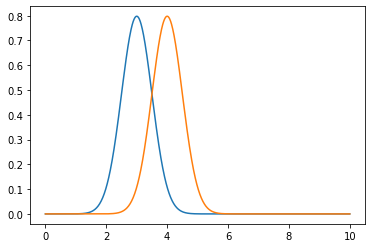

In [84]:
# визначимо область значень нашої змінної в інтервалі від 0 до 10 і згенеруємо 1000 точок у цьому інтервалі рівномірно
DOMAIN = np.linspace(0, 10, num=1000)

# визначимо функцію щільності нормального розподілу залежно від середнього та стандартного відхилення на нашому інтервалі
def dens(mu, sigma=0.5):
    return np.exp(-(DOMAIN - mu) ** 2 / (2 * sigma ** 2)) / (np.sqrt(2 * np.pi) * sigma)

# тепер покажемо, як виглядає щільність для двох різних середніх значень з однаковим стандартним відхиленням
f1, f2 = dens(3), dens(4)
plt.plot(DOMAIN, f1)
plt.plot(DOMAIN, f2)
plt.show()

&emsp;&emsp;Ми можемо знайти загальну щільність для двох запропонованих величин усереднив наявні щільності:

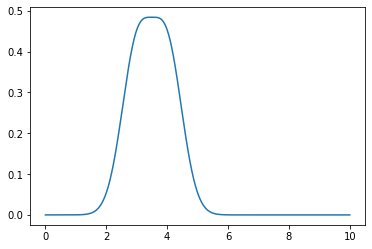

In [85]:
f_average = (f1 + f2) / 2
plt.plot(DOMAIN, f_average)
plt.show()

&emsp;&emsp;Зверніть увагу, що за певних умов (відстань між середніми значеннями та невелика дисперсія) загальна щільність може вийти з одним згладженим піком замість двох окремих як було спочатку.

&emsp;&emsp;Тепер припустимо, що у нас є 2 кластери даних. Один зосереджений в околі 2, другий  - 4.

In [31]:
np.random.seed(21)
cluster1 = np.random.normal(2, scale=0.4, size=10)
cluster2 = np.random.normal(4, scale=0.4, size=15)

&emsp;&emsp;Якщо намалювати щільності вважаючи, що у нас є стільки випадкових величин, скільки точок, і середня кожної знаходиться у відповідній точці, то у нас вийде наступний графік:

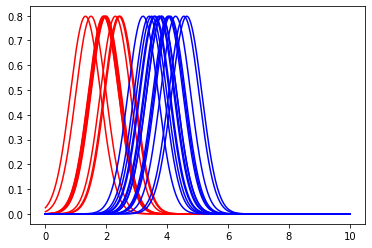

In [32]:
f_cluster1 = np.array([dens(x) for x in cluster1])
f_cluster2 = np.array([dens(x) for x in cluster2])

for plot_col, cluster in zip(('r', 'b'), (f_cluster1, f_cluster2)):
    for f in cluster:
        plt.plot(DOMAIN, f, c=plot_col)

plt.show()

&emsp;&emsp;Тепер побудуємо графік середнього значення всіх отриманих щільностей:

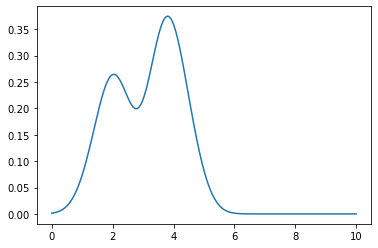

In [33]:
f_average = np.mean(np.concatenate([f_cluster1, f_cluster2], axis=0), axis=0)
plt.plot(DOMAIN, f_average)
plt.show()

&emsp;&emsp;Як бачимо у нас вийшла функція, яка має 2 локальні максимуми поруч із центрами відповідних кластерів. Тепер ми можемо обчислити відстань від кожної точки до найближчого максимуму і віднести відповідну точку до того локального максимуму, до якого вона знаходиться ближче. У нашому випадку це дасть добрий поділ на запропоновані кластери.

&emsp;&emsp;На практиці вирішити завдання запропонованим чином виявляється складно, тому що отримана функція може мати набагато більше локальних максимумів, ніж існує кластерів і знайти їх положення аналітично буває досить складно. Тому зручно обчислити не саме положення максимуму, а напрям, у якому слід рухатися, щоб із заданої точки перейти до максимуму. Такою самою процедурою ми користувалися в алгоритмі градієнтного спуску, тільки там ми шукали напрямок, в якому потрібно просунутися, щоб перейти до точки ближче до мінімуму функції.

&emsp;&emsp;Фінально, алгоритм можна описати так:

1. Для кожної точки $х$ даних обчислюємо вираз

$$m(x) = \frac{\sum_{i=1}^{n}{K(x_{i} - x)x_{i}}}{\sum_{i=1}^{n}{K(x_{i} - x)}}$$

$K(x_{i} - x)$ - деяка кернел функція, яка визначає відстань між точками, як було у методі опорних векторів. 
Зазвичай беруть $K(x_{i} - x) = e^{-c(x_{i} - x)^{2}}$

Інтуїтивно запропоновану формулу можна зрозуміти як виважене середнє значення, де найближчим сусідам точки дається більша вага, ніж віддаленим. Якщо середнє більше, ніж поточна точка, то пік знаходиться праворуч і точку слід "посунути" праворуч і навпаки

2. Для кожного х замінюємо x на m(x)

3. Повторюємо перші 2 кроки доти, доки точки практично не перестають змінюватися (так само, як ми це робили з параметрами в алгоритмі градієнтного спуску)

4. Точки, що знаходяться на відстані не більше порогового значення, об'єднуються в одні кластери.

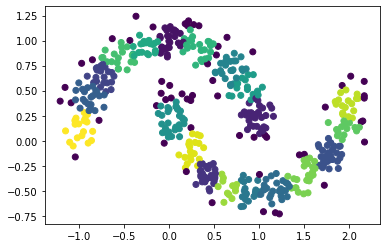

In [86]:
from sklearn.cluster import MeanShift

ms = MeanShift(
    bandwidth=0.2,  # параметр, що визначає розмір кластера (аналог стандартного відхилення у прикладах вище)
    cluster_all=False  # за аналогією з DBSCAN є можливість відкинути точки, які не належать до жодного кластера
)

ms = ms.fit(X)
ms_clusters = ms.labels_  # отримаємо значення кластерів для кожної точки

plt.scatter(X[:, 0], X[:, 1], c=ms_clusters)
plt.show()


&emsp;&emsp;При виборі алгоритму кластеризації потрібно завжди брати до уваги специфіку даних. Наприклад, DBSCAN та MeanShift - це популярні алгоритми кластеризації просторових даних (представлених у вигляді широти та довготи). Наприклад, якщо стоїть завдання знайти кластери, у яких часто буває користувач, то DBSCAN впорається з цим завданням так:

![title](DBSCAN_city_clusters.png)

&emsp;&emsp;Судячи з усього, це 2 різних кластери (будинок і кав'ярня поруч), однак через те, що між цими кластерами є точки, що фіксують шлях з одного місця в інше, то DBSCAN об'єднав їх в один кластер. MeanShift, у свою чергу, дає кластери більш округлої форми через те, що для нього важливі лише концентрація точок, тому його результат буде кращим у даному випадку:

![title](MeanShift_city_clusters.png)

&emsp;&emsp;В інших випадках, якщо нам важлива тректорія руху людини в місті, то DBSCAN може виявитися більш відповідним.

# Аналіз головних компонент (PCA - principal components analysis)

&emsp;&emsp;Почнемо з визначень:

&emsp;&emsp;Власний вектор квадратної матриці це такий ненульовий вектор, який при множенні на цю матрицю перетворюється на себе, помноженого на деякий коефіцієнт. Сам коефіцієнт, на який домножується оригінальний вектор в результаті, називається власним числом матриці:

$$Av = \lambda v$$

&emsp;&emsp;Де $v$ - власний вектор, а $\lambda$ - власне число матриці $А$. Будь-який інший вектор $v^{*}$, який збігається з вектором $v$, але є в n разів довшим, теж вважається власним вектором. Таким чином виходить, що матриця має нескінченно багато власних векторів, проте більшість їх лінійно залежні.

&emsp;&emsp;Знаходяться власні числа та власні вектори наступним чином (на прикладі квадратної матриці 2х2):

$$A = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$$

$$v = \begin{pmatrix} x\\y \end{pmatrix}$$

$$Av = \lambda v => \begin{pmatrix} a & b \\ c & d \end{pmatrix}\begin{pmatrix} x\\y \end{pmatrix} = \lambda \begin{pmatrix} x\\y \end{pmatrix} =>$$

$$=> \begin{pmatrix} ax + by \\ cx + dy \end{pmatrix} = \begin{pmatrix} \lambda x\\\lambda y \end{pmatrix} => \begin{pmatrix} ax + by - \lambda x \\ cx + dy - \lambda y \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} => \begin{pmatrix} x(a - \lambda) + by \\ cx + y(d - \lambda) \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} =>$$

$$ => x\begin{pmatrix} (a - \lambda)\\c \end{pmatrix} + y\begin{pmatrix} b\\(d - \lambda) \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$

&emsp;&emsp;Останній рядок означає, що вектори $\begin{pmatrix} (a - \lambda)\\c \end{pmatrix}$ і $\begin{pmatrix} b\\(d - \lambda) \end{pmatrix}$ лінійно залежні. Це в, свою чергу, означає, що у матриці $B = \begin{pmatrix} (a - \lambda) & b \\ c & (d - \lambda) \end{pmatrix}$ визначник рівний 0. Таким чином нам залишилося знайти такі значення $\lambda$, для яких $det(B) = 0.$

&emsp;&emsp;Для матриці 2х2 виду $\begin{pmatrix} a&b\\ c&d\end{pmatrix}$ визначник дорівнює $ad - bc$. Тобто нам залишилося вирішити рівняння $(a - \lambda)(d - \lambda) - bc = 0$ з якого отримаємо два корені $\lambda_1, \lambda_2$, що відповідають двом лінійно незалежним власним векторам. Взявши одне із власних чисел, можемо повернутися до рівняння $x\begin{pmatrix} (a - \lambda)\\c \end{pmatrix} + y\begin{pmatrix} b\\(d - \lambda) \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$ і підставляючи до нього довільні x, y, які задовольняють рівності, визначити власні вектори, що відповідають цьому власному числу.

&emsp;&emsp;У загальному випадку, матриця A розміру nxn повного рангу буде мати n власних чисел і n лінійно незалежних векторів (крім того, що кожен власний вектор має нескінченно багато "двійників", що відрізняються від нього тільки довжиною). Власні числа в загальному випадку знаходяться так:

$$Av = \lambda v => Av - \lambda Iv = 0 => (A - \lambda I)v = 0 => det(A - \lambda I) = 0$$

&emsp;&emsp;Оскільки одному власному числу відповідає багато власних векторів, то у програмній імплементації прийнято видавати такий, довжина якого навна 1. Розглянемо приклад:

In [87]:
np.random.seed(42)
A = np.random.randint(0, 10, (2, 2))  # створимо квадратну матрицю із випадкових чисел
eigen_values, eigen_vectors = np.linalg.eig(A)  # знайдемо власні числа та вектори матриці

print(A)
print(eigen_values)
print(eigen_vectors)

[[6 3]
 [7 4]]
[9.69041576 0.30958424]
[[ 0.63078729 -0.46636038]
 [ 0.77595579  0.88459482]]


In [88]:
# переконаємося, що перший вектор справді є власним

# помножимо перший власний вектор на матрицю А зліва
actual_transform = A.dot(eigen_vectors[:, 0])
# помножимо перший власний вектор на перше власне число
theor_transform = eigen_values[0] * eigen_vectors[:, 0]

print(actual_transform, theor_transform)

[6.11259114 7.51933422] [6.11259114 7.51933422]


&emsp;&emsp;Якщо записати всі власні вектори як стовпці матриці $Q$, як це зроблено в реалізації numpy, то можна дійти наступної формули $AQ = Q\Lambda$ (де $\Lambda$ - діагональна матриця, що складається з власних чисел ), звідки слідує

$$AQQ^{-1} = Q\Lambda Q^{-1} => A = Q\Lambda Q^{-1}$$

&emsp;&emsp;Остання формула називається спектральним розкладом матриці, де власні значення $\Lambda$ називаються спектором матриці. У цього розкладу є низка дуже корисних властивостей. Одне з них таке: щоб піднести матрицю $A$ до степеня $n$, можна звести до степеня $n$ кожне власне число цієї матриці, а потім отримати $A^{n} = Q\Lambda^{n} Q^{-1}$. Насправді так і роблять, що працює набагато швидше, ніж послідовне множення матриці на саму себе.
$$
A^{n} = Q\Lambda Q^{-1} Q\Lambda Q^{-1} Q\Lambda Q^{-1} ... Q\Lambda Q^{-1} = 
 Q\Lambda \Lambda \Lambda ...\Lambda Q^{-1} = Q\Lambda^{n} Q^{-1}. 
$$

&emsp;&emsp;Інша властивість, якою ми будемо користуватися наступна: якщо $А$ - симетрична матриця, то всі її власні вектори, що відповідають різним власним числам, ортогональні один одному.

&emsp;&emsp;Тепер можемо переходити безпосередньо до PCA. Припустимо, у нас є дві корелюючі одина з одниою змінні:

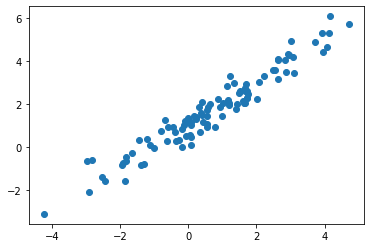

In [89]:
x1 = np.random.normal(1, 2, size=(100, 1))  # створимо першу змінну
x2 = x1 + np.random.normal(1, 0.5, size=(100, 1))  # отримаємо другу змінну додавши до першої випадковий шум

X = np.concatenate([x1, x2], axis=1)  # об'єднаємо обидві змінні в одну матрицю

# відобразимо наші змінні на графіку
plt.scatter(x1, x2)
plt.show()

In [90]:
X

array([[ 5.31693251e-01,  1.45105039e+00],
       [ 5.31726086e-01,  1.73375151e+00],
       [ 4.15842563e+00,  6.10151858e+00],
       [ 2.53486946e+00,  3.62215836e+00],
       [ 6.10512281e-02,  1.18982642e+00],
       [ 2.08512009e+00,  3.04789713e+00],
       [ 7.31646144e-02,  1.13779007e-01],
       [ 6.85404929e-02,  1.05528356e+00],
       [ 1.48392454e+00,  2.51403965e+00],
       [-2.82656049e+00, -5.94939433e-01],
       [-2.44983567e+00, -1.54601615e+00],
       [-1.24575058e-01,  1.02619861e+00],
       [-1.02566224e+00, -4.30181255e-02],
       [ 1.62849467e+00,  2.04415565e+00],
       [-8.16048151e-01,  7.55363256e-01],
       [-1.82460740e+00, -4.48640886e-01],
       [ 3.93129754e+00,  5.32681351e+00],
       [ 5.48447399e-01,  1.09375367e+00],
       [ 1.13505641e+00,  2.83645356e+00],
       [-1.84949637e+00, -1.55042190e+00],
       [-8.87654491e-02,  1.20466310e+00],
       [ 1.22184518e+00,  3.31707299e+00],
       [-1.30198715e+00, -7.97255317e-01],
       [ 1.

&emsp;&emsp;Форма нашого графіка залежить від осей, у яких ми його побудували. На даний момент це самі змінні х1 та х2. Однак, ми могли б підібрати інші координатні осі ах1 і ах2, в яких наші дані виглядали б інакше. Зробимо це таким чином, щоб

&emsp;&emsp;1. У нових осях кореляції між змінними не було

&emsp;&emsp;2. Точка (0, 0) у нових координатах збігалася з "центром" наших даних

&emsp;&emsp;3. Більша частина варіації наших даних знаходилася вздовж однієї з осей

In [91]:
var_means = np.mean(X, axis=0)  # обчислимо середні значення змінних
X_centered = X - var_means  # віднімемо середні значення від оригінальних змінних
X_covar = X_centered.T.dot(X_centered)  # знайдемо коварійну матрицю X
eigen_values, eigen_vectors = np.linalg.eig(X_covar)  # знайдемо власні числа та власні вектори

# виберемо в якості першої осі власний вектор, який відповідає максимальному власному числу,
# а другий той, що відповідає другому за величиною (у нашому випадку мінімальному)
ax1, ax2 = eigen_vectors[:, np.argmax(eigen_values)], eigen_vectors[:, np.argmin(eigen_values)]

# знайдемо значення змінних у нових осях, домноживши матрицю оригінальних змінних на матрицю власних векторів
X_transform = X_centered.dot(np.vstack([ax1, ax2]))

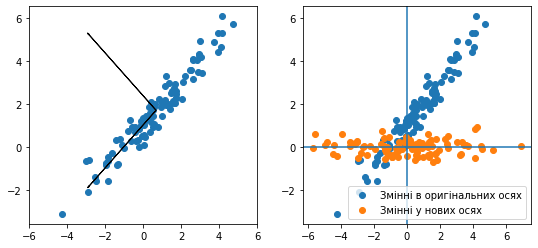

In [92]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plt.scatter(x1, x2)
plt.arrow(*var_means, *ax1 * 5, head_width=0.05, head_length=0.1)
plt.arrow(*var_means, *ax2 * 5, head_width=0.05, head_length=0.1)
plt.xlim(-6, 6)
plt.subplot(122)
plt.scatter(x1, x2, label='Змінні в оригінальних осях')
plt.scatter(X_transform[:, 0], X_transform[:, 1], label='Змінні у нових осях')
plt.axvline(0)
plt.axhline(0)
plt.legend()
plt.show()

&emsp;&emsp;Насправді, нам не так важливі нові осі, скільки перетворення оригінальних змінних, яке необхідно провести, щоб відобразити їх у нових осях. Для того, щоб отримати нові змінні в нових осях, які відповідають викладеним вище вимогам, ми маємо зробити таке:

&emsp;&emsp;1. Змістимо "центр" наших даних на початок координат. Це робиться шляхом віднімання середнього значення змінних (тоді, очевидно, нове середнє буде дорівнює 0 і збігатиметься з початком координат)

&emsp;&emsp;2. Для того, щоб отримати нові змінні в нових осях, визначимо деякі вектори $w_{1}$ і $w_{2}$ ті, що точка в нових осях виходить на основі точки в старих як 
$$x_{new} = (x_{ old}, y_{old})w_{1},$$ 
$$y_{new} = (x_{old}, y_{old})w_{2}$$

&emsp;&emsp;3. Ми також хочемо, щоб дисперсія першої змінної в нових осях була максимальною, тобто

$$Var(x_{new}) = \frac{1}{n}\sum_{i=1}^{n}{(x_{new}^{i} - \mu_{x_{new}})^{2}} = \frac{1}{n}\sum_{i=1}^{n}{((x_{old}, y_{old})^{i}w_{1} - \mu_{x_{new}})^{2}} \to max$$

&emsp;&emsp;З огляду на те, що в нових осях середнє значення $x_{new} = 0$ ми можемо його не писати. Також ми можемо проігнорувати множник $\frac{1}{n}$, оскільки він не впливає на положення точки, в якій досягається максимум дисперсії. Звідси можемо обчислити значення $w_{1}$:

$$w_{1} = argmax\sum_{i=1}^{n}{((x_{old}, y_{old})^{i}w_{1})^{2}}$$

&emsp;&emsp;Об'єднавши всі $(x_{old}, y_{old})$ у матрицю $Х$, ми можемо записати в матричній формі:

$$w_{1} = argmax[(Xw_{1})^{T}Xw_{1}] = argmax[w_{1}^{T}X^{T}Xw_{1}]$$

&emsp;&emsp;Справа в тому, що збільшуючи довжину вектора $w_{1}$ ми можемо отримати скільки завгодно велике значення дисперсії, проте в цьому буде мало практичної цінності (взяти більш довгий $w_{1}$ рівносильно тому, щоб домножити кожну точку $x_{new}$ на деяку константу). Тому ми обмежимо себе, додавши, що вектор $w_{1}$ повинен мати одиничну довжину. На практиці це обмеження вводять так:

$$w_{1} = argmax\frac{w_{1}^{T}X^{T}Xw_{1}}{w_{1}^{T}w_{1}}$$

&emsp;&emsp;Можна показати, що вектор $w_{1}$, який насцікавить, дорівнює власному вектору матриці $X^{T}X$, що відповідає максимальному власному числу. В своєю чергою, матриця $X^{T}X$ дорівнює коваріаційній матриці $X$ після того, як ми відняли від $X$ середні значення змінних. Нарешті, виявляється, що всі вектори $w$ (у разі їх лише два: $w_{1}$ і $w_{2}$) відповідають власним векторам матриці $X^{T}X$.

&emsp;&emsp;Змінні, отримані нами в нових осях називаються головними компонентами (principal components). Насправді часто зустрічаються дані, у яких дуже багато змінних і багато хто з них дуже пов'язані між собою. Перейшовши до нової системи координат ми можемо відмовитися від тих змінних, дисперсія яких найменша (вважається, що чим вище дисперсія змінної, тим більше в ній міститься інформації; у гіршому випадку, змінна може бути константою, що відповідає нульовій дисперсії і тоді вона нам абсолютно нецікава у процесі аналізу).

&emsp;&emsp;У прикладі вище ми могли б проігнорувати отриману змінну ax2, оскільки більша частина інформації зосереджена вздовж горизонтальної осі. Відсоток пояснювальної дисперсії тими компонентами, які ми вирішили залишити, обчислюють як відношення суми власних чисел тих компонентів, які ми залишили до загальної суми власних чисел:

In [93]:
print(f'Змінна ax1 містить {np.round(100 * eigen_values[1] / np.sum(eigen_values), 1)} % дисперсії')

Змінна ax1 містить 98.3 % дисперсії


&emsp;&emsp;Це відповідає дійсності, оскільки друга створена нами оригінальна змінна абсолютно неінформативна і перейшовши тільки до однієї головної компоненти ми збережемо практично всю інформацію, що нас цікавить.

&emsp;&emsp;Розглянемо приклад з ірисами:

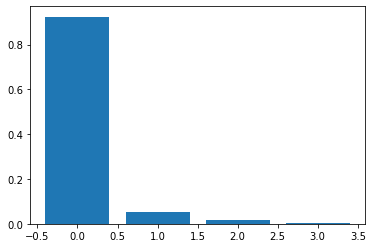

In [94]:
from sklearn.decomposition import PCA

# вивантажимо дані
iris = datasets.load_iris()
X = iris.data  # цього разу візьмемо всі 4 змінні, що описують квітку
y = iris.target

# знайдемо головні компоненти
pca = PCA(
    n_components=4  # знайдемо всі 4 можливі компоненти, тому що у нас є 4 оригінальні змінні
).fit(X)

# побудуємо графік поясненої дисперсії кожною компонентою
plt.bar(range(4), pca.explained_variance_ratio_)
plt.show()

&emsp;&emsp;Тобто ми могли б залишити тільки першу компоненту, знизивши таким чином розмірність даних з 4 до 1, зберігаючи при цьому майже 90% дисперсії. Відобразимо наші дані на графіку з перших 2-х головних компонентів:

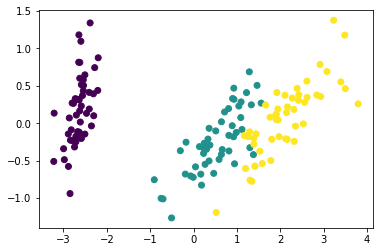

In [95]:
X_transform = pca.transform(X)  # перейдемо до нових осей

plt.scatter(X_transform[:, 0], X_transform[:, 1], c=y)
plt.show()

In [104]:
svm = SVC(
    C=1.,
    kernel='rbf',
    decision_function_shape='ovr'  # побудувати по моделлю на кожен клас, як "один проти всіх"
).fit(X_transform, y)

In [105]:
y_preds = svm.predict(X_transform)
f1_score(y, y_preds, average='macro')

0.9866613311991462

In [107]:
svm = SVC(
    C=1.,
    kernel='rbf',
    decision_function_shape='ovr'  # побудувати по моделлю на кожен клас, як "один проти всіх"
).fit(X_transform[:, :2], y)

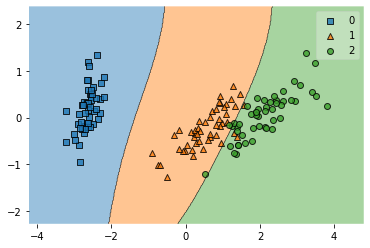

In [108]:
plot_decision_regions(X_transform[:, :2], y, clf=svm)
plt.show()